第三章 案例一 —— 为什么销售额会减少

In [1]:
import os
import pandas as pd
import numpy as np

读入CSV文件

In [2]:
filepath = os.getcwd() + '/datasets/' 

In [3]:
## 包含各个日期里使用该应用的全部用户的ID
dau = pd.read_csv(filepath + 'section3-dau.csv') 
dau.head()

,log_date,app_name,user_id
0,2013-06-01,game-01,116
1,2013-06-01,game-01,13491
2,2013-06-01,game-01,7006
3,2013-06-01,game-01,117
4,2013-06-01,game-01,13492


In [4]:
## 保存有消费行为的用户每日所消费的金额数据
dpu = pd.read_csv(filepath + 'section3-dpu.csv')
dpu.head()

,log_date,app_name,user_id,payment
0,2013-06-01,game-01,351,1333
1,2013-06-01,game-01,12796,81
2,2013-06-01,game-01,364,571
3,2013-06-01,game-01,13212,648
4,2013-06-01,game-01,13212,1142


In [5]:
## 保存各个用户是在何年何月何日首次玩这个应用的数据
install = pd.read_csv(filepath + 'section3-install.csv')
install.head()

,install_date,app_name,user_id
0,2013-04-15,game-01,1
1,2013-04-15,game-01,2
2,2013-04-15,game-01,3
3,2013-04-15,game-01,4
4,2013-04-15,game-01,5


合并数据集

In [6]:
dau_install = dau.merge(install, how='inner', on=['user_id', 'app_name'])
dau_install.head()

,log_date,app_name,user_id,install_date
0,2013-06-01,game-01,116,2013-04-17
1,2013-06-02,game-01,116,2013-04-17
2,2013-06-03,game-01,116,2013-04-17
3,2013-06-04,game-01,116,2013-04-17
4,2013-06-05,game-01,116,2013-04-17


In [7]:
dau_install_payment = dau_install.merge(dpu, how='left', on=['log_date', 'app_name', 'user_id'])
dau_install_payment.head()

,log_date,app_name,user_id,install_date,payment
0,2013-06-01,game-01,116,2013-04-17,NaN
1,2013-06-02,game-01,116,2013-04-17,NaN
2,2013-06-03,game-01,116,2013-04-17,NaN
3,2013-06-04,game-01,116,2013-04-17,NaN
4,2013-06-05,game-01,116,2013-04-17,NaN


In [8]:
dau_install_payment.loc[dau_install_payment.payment.notnull()].head()

,log_date,app_name,user_id,install_date,payment
86,2013-06-02,game-01,117,2013-04-17,1333.0
87,2013-06-02,game-01,117,2013-04-17,571.0
95,2013-06-10,game-01,117,2013-04-17,952.0
96,2013-06-11,game-01,117,2013-04-17,1333.0
97,2013-06-11,game-01,117,2013-04-17,571.0


In [9]:
## 将未消费的记录的消费额设置为0
dau_install_payment.payment.fillna(0, inplace=True)
dau_install_payment.head()

,log_date,app_name,user_id,install_date,payment
0,2013-06-01,game-01,116,2013-04-17,0.0
1,2013-06-02,game-01,116,2013-04-17,0.0
2,2013-06-03,game-01,116,2013-04-17,0.0
3,2013-06-04,game-01,116,2013-04-17,0.0
4,2013-06-05,game-01,116,2013-04-17,0.0


按月统计

In [10]:
## 增加一列表示月份
dau_install_payment['log_month'] = dau_install_payment['log_date'].apply(lambda x: x[:7])
dau_install_payment['install_month'] = dau_install_payment['install_date'].apply(lambda x: x[:7])
dau_install_payment.head()

,log_date,app_name,user_id,install_date,payment,log_month,install_month
0,2013-06-01,game-01,116,2013-04-17,0.0,2013-06,2013-04
1,2013-06-02,game-01,116,2013-04-17,0.0,2013-06,2013-04
2,2013-06-03,game-01,116,2013-04-17,0.0,2013-06,2013-04
3,2013-06-04,game-01,116,2013-04-17,0.0,2013-06,2013-04
4,2013-06-05,game-01,116,2013-04-17,0.0,2013-06,2013-04


In [11]:
mau_payment = dau_install_payment.groupby(['user_id', 'log_month', 'install_month'])['payment'].sum().reset_index()
mau_payment.head()

,user_id,log_month,install_month,payment
0,1,2013-06,2013-04,0.0
1,1,2013-07,2013-04,0.0
2,2,2013-06,2013-04,0.0
3,3,2013-06,2013-04,14994.0
4,3,2013-07,2013-04,0.0


增加属性来区分新用户和已有用户

In [12]:
# mau_payment['user_type'] = None
# mau_payment.loc[mau_payment['install_month'] == mau_payment['log_month'], 'user_type'] = 'install'
# mau_payment.loc[mau_payment['install_month'] != mau_payment['log_month'], 'user_type'] = 'existing'

mau_payment['user_type'] = np.where((mau_payment['install_month'] == mau_payment['log_month']), 'install', 'existing')
mau_payment.head()

,user_id,log_month,install_month,payment,user_type
0,1,2013-06,2013-04,0.0,existing
1,1,2013-07,2013-04,0.0,existing
2,2,2013-06,2013-04,0.0,existing
3,3,2013-06,2013-04,14994.0,existing
4,3,2013-07,2013-04,0.0,existing


In [13]:
mau_payment_summary = mau_payment.groupby(['log_month', 'user_type'])['payment'].sum().reset_index()
mau_payment_summary.head()

,log_month,user_type,payment
0,2013-06,existing,177886.0
1,2013-06,install,49837.0
2,2013-07,existing,177886.0
3,2013-07,install,29199.0


数据可视化

In [14]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-deep')
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

%matplotlib inline

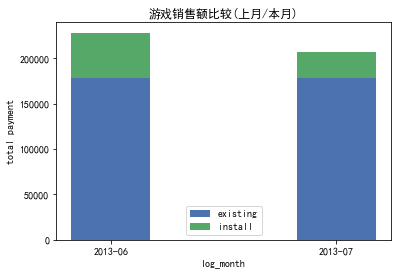

In [15]:
width = 0.35
months = ['2013-06', '2013-07']
existing = [177886.0, 177886.0]
install = [49837.0, 29199.0]
p1 = plt.bar(months, existing, width)
p2 = plt.bar(months, install, width, bottom=existing)
plt.xlabel("log_month")
plt.ylabel("total payment")
plt.legend((p1[0], p2[0]), ('existing', 'install'))
plt.title("游戏销售额比较(上月/本月)")
plt.show()

In [16]:
install = mau_payment.loc[(mau_payment['user_type'] == 'install') & (mau_payment['payment'] > 0)]
install.head()

,user_id,log_month,install_month,payment,user_type
8947,13948,2013-06,2013-06,243.0,install
9541,14421,2013-06,2013-06,162.0,install
9562,14438,2013-06,2013-06,81.0,install
9582,14454,2013-06,2013-06,6595.0,install
9930,14729,2013-06,2013-06,243.0,install


In [17]:
bins = np.linspace(0, 16000, 10)
month_06 = list(install.loc[install['log_month'] == '2013-06', 'payment'])
month_07 = list(install.loc[install['log_month'] == '2013-07', 'payment'])

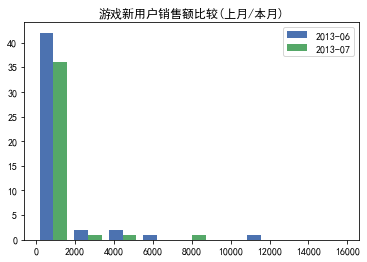

In [18]:
plt.hist([month_06, month_07], bins, label=['2013-06', '2013-07'])
plt.legend(loc='upper right')
plt.title("游戏新用户销售额比较(上月/本月)")
plt.show()